## PRiAD 5

# Uczenie nadzorowane

Ćwiczenie jest poświęcone metodom **uczenia nadzorowanego** (ang. supervised learning). Zostaną w nim pokazane wybrane metody klasyfikacji i regresji. 

W przypadku **klasyfikacji**, zbiór (macierz) danych składa się z obiektów charakteryzujących się atrybutami opisującymi (cechami) i kategorycznym atrybutem decyzyjnym (zmiennej celu). Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności do właściwej klasy (nowego) obiektu dla którego znane są jedynie wartości atrybutów opisujących. 

Od algorytmów uczenia maszynowego nie wymaga się tylko i wyłącznie umiejętności powtarzania wyuczonych reguł dla obserwacji ze zbioru uczącego, ale wymaga się również umiejętności uogólnienia (generalizacji) wyników dla innych obserwacji. W tym celu, do sprawdzenia poprawności działania opracowanego modelu, przed przystąpieniem do procesu uczenia z posiadanego zbioru danych wyodrębnia się zbiór danych zwany zbiorem testowym, które nie bierze udziału w procesie uczenia, a jedynie pozwala na kontrolę opracowanego/wyuczonego modelu i ocenienie jego skuteczności dla danego zadania klasyfikacji. Podział zbioru danych wykonywany jest najczęściej w proporcjach 80/20 lub 70/30. Często ze zbioru uczącego warto jest jeszcze wyodrębnić zbiór walidacyjny, który to pomaga nam wstępnie przygotować parametry wykorzystywanych algorytmów by były w stanie poradzić sobie procesem dopasowania (wyuczenia) do posiadanych danych.

W ćwiczeniu pokazane zostaną następujące metody klasyfikacji:
1. Metoda najbliżego sąsiada 
2. Metoda k-najbliższych sąsiadów
3. Metoda najbliższego prototypu
4. Naiwny klasyfikatory Bayesa
5. Drzewa decyzyjne

W przypadku **regresji** wartością wyjściową/atrybutem decyzyjnym opracowywanego przez nas modelu jest wartość będąca ciągłą wartością numeryczną (jest wielkością liczbową). W punkcie 6 ćwiczenia zostanie zostanie pokazany prosty modeli regresji liniowej. 

Na początek jednak, tradycyjnie, zostaną wczytane niezbędne pakiety.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

Dodatkowo, wczytane zostaną procedury niezbędne do realizacji zadań klasyfikacji z pakietu `scikit-learn`

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree

## 1. Klasyfikator najbliższego sąsiada

Zasadą działania metod najbliższego sąsiada (1-NN) jest poszukiwanie najbliższego sąsiada dla nowego obiektu o nieznanej klasie, wśród obiektów znajdujących się w zbiorze uczącym. Klasa, do której najbliższy sąsiad przynależy jest przypisywana klasyfikowanemu obiektowi. Poniższy przykład pokazuje wyszukiwanie najbliższych sąsiadów.

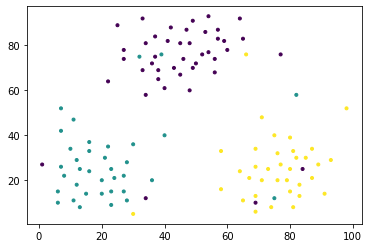

In [3]:
df = pd.read_csv('dane2.csv')
plt.scatter(df.loc[:, 'atrybut1'], df.loc[:, 'atrybut2'], c=df["klasa"].astype('category').cat.codes, marker = '.')
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree')
nbrs.fit(df[['atrybut1','atrybut2']])
distances, indices = nbrs.kneighbors(df[['atrybut1','atrybut2']])

In [4]:
nbrs_wynik = pd.DataFrame({'atrybut1':df.loc[:, 'atrybut1'],
                           'atrybut2':df.loc[:, 'atrybut2'],
                           'Najbliższy': indices[:,1],
                           'Odlegość od najbl.': distances[:,1],
                           'Drugi najbl.': indices[:,2],
                           'Odlegość od drugiego': distances[:,2]})
nbrs_wynik.head(20)

,atrybut1,atrybut2,Najbliższy,Odlegość od najbl.,Drugi najbl.,Odlegość od drugiego
0,66,76,53,6.32,54,7.07
1,30,5,89,6.32,99,8.06
2,77,76,0,11.00,54,13.89
3,25,89,4,8.54,79,11.18
4,33,92,3,8.54,71,8.94
5,64,92,62,8.60,54,9.06
6,48,60,57,7.62,56,8.06
7,56,68,59,6.00,74,7.21
8,34,58,56,6.71,55,8.06
9,22,64,80,11.18,81,12.08


> **Pytanie** Czy relacja "x jest najbliższym sąsiadem y" jest symetryczna ? Zastanów się czy tak jest i sprawdź w powyższych wynikach.

Dla sprawdzenia działania (każdego) klasyfikatora, należy podzielić zbiór danych na uczący i testowy. W tym celu wykorzystuje się funkcję `train_test_split`. Funkcja ta zarówno na wejściu jak i na wyjściu wymaga podania osobno atrybutów opisujących i atrybutu decyzyjnego. Taki sposób reprezentacji będzie wykorzystywany dalej przez funkcje realizujące zadania klasyfikacji. Dla ułatwienia przygotowana została funkcja realizująca podział zbioru i zapisująca zbiór uczący i testowy w jednej strukturze (słowniku).

In [5]:
def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

dane = podziel(df,0.3)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))

Liczba obiektów zbioru uczącego:  79
Liczba obiektów zbioru testowego:  35


Następnie zostanie utworzony model klasyfikatora najbliższego sąsiada. Do tego celu wykorzystana zostanie funkcja `KNeighborsClassifier`, której parametr *n_neighbors* określa zadaną liczbę sąsiadów - w tym przypadku równą 1. 

In [6]:
model = KNeighborsClassifier(n_neighbors=1)

Jakość klasyfikacji można oceniać przy pomocy np. macierzy pomyłek (zwanej także macierzą kontyngencji lub tabelą krzyżową), która zawiera informacje o liczbie obiektów przypisanych do klas przez wybrany model klasyfikatora dla poszczególnych wartości atrybutu decyzyjnego. Macierz taką wyznacza się zarówno dla zbioru uczącego jak i dla zbioru testowego. Procedura `weryfikuj` wyświetla macierze pomyłek dla obu zbiorów. 

In [7]:
def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    print("Macierz pomyłek dla zbioru uczącego")
    print(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print("Macierz pomyłek dla zbioru testowego")
    print(pd.crosstab(dane["dec_test"],wynik_test)) 

Badanie klasyfikatora wymaga wykonania następującej sekwencji czynności:

In [8]:
# wczytanie badanego zbioru danych
df = pd.read_csv('dane1.csv')
print(df.info())
# 
#sns.pairplot(df, kind="scatter", hue = "klasa")
#plt.show()

# podział zbioru danych
d = podziel(df,0.3)
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=1)
# weryfikacja
weryfikuj(model,d,[0,1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   atrybut1  80 non-null     int64 
 1   atrybut2  80 non-null     int64 
 2   klasa     80 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.0+ KB
None
Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      15   0   0
1       0  12   0
2       0   0  29
Macierz pomyłek dla zbioru testowego
col_0  0  1  2
row_0         
0      9  0  0
1      0  7  0
2      0  0  8


Wynik testu dla zbioru uczącego w przypadku klasyfikatora 1-NN jest oczywisty, niezależnie od danych wejściowych. Jak będzie się można przekonać w dalszej części ćwiczenia, nie będzie to juz takie oczywiste dla innych klasyfikatorów i zbiorów danych.

Granice decyzyjne oddzielają obszary przestrzeni atrybutów, które odpowiadają poszczególnym klasom. Sposób podziału przestrzeni atrybutów zależy przy tym od rodzaju klasyfikatora. Ponieważ granice decyzyjne mogą być czytelnie uwidocznione na wykresie punktowym dwuwymiarowym. W przypadku większej liczby takich atrybutów należy
więc wybrać dwa spośród nich i dla niech przeprowadzić operacje wyznaczania i wizualizacji granic decyzyjnych. Do wizualizacji granic decyzyjnych została przygotowana procedura `granice`.

In [9]:
def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    # wyświetla granice decyzyjne
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atr_x/atr_y - artybut wyswietlany na osi x/y
    # tytul - wyświetlany tytuł wykresu
    # kontur - par. opcjonalny (=0 -> brak konturu)
    if (kontur == 1):    
        model.fit(dane["opis_ucz"].iloc[:,[atr_x,atr_y]], dane["dec_ucz"])
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Wizualizacja granic decyzyjnych ułatwia analizę klasyfikatora.

Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      26   1   1
1       0  22   2
2       1   1  25
Macierz pomyłek dla zbioru testowego
col_0   0   1  2
row_0           
0      13   1  1
1       2  10  0
2       0   0  8


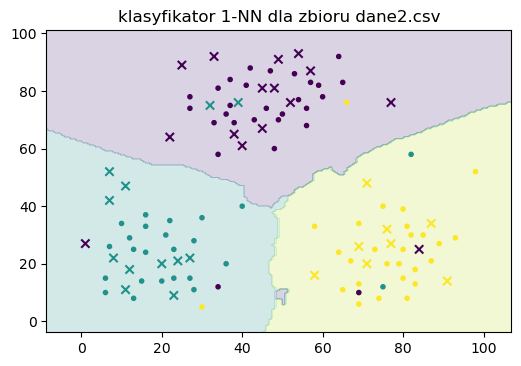

In [10]:
nazwa_pliku = 'dane2.csv'
# wczytanie badanego zbioru danych
df = pd.read_csv(nazwa_pliku)
# podział zbioru danych
d = podziel(df,0.3)
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=5)
# wybór atrybutów
ax, ay = 0,1
# granice dycyzyjne
granice(model,d,ax,ay,"klasyfikator 1-NN dla zbioru " + nazwa_pliku)
# weryfikacja
weryfikuj(model,d,[ax,ay])

> **Zadanie** Czy wyniki dla zbioru `dane2` są lepsze czy gorsze niż dla `dane1`? Zastanów się, dlaczego ?

In [11]:
# miejsce na kod


> **Zadanie** Poeksperymentuj w analogiczny sposób z pozostałymi macierzami `dane`, w tym także ze zbiorem `iris`. Oceń przydatność klasyfikatora dla każdego zbioru danych.

In [12]:
# miejsce na kod


Procedura `granice` umożliwia także wyświetlenie wykresów punktowych danych z podziałem na zbiór testowy i uczący bez wyświetlania granic decyzyjnych.

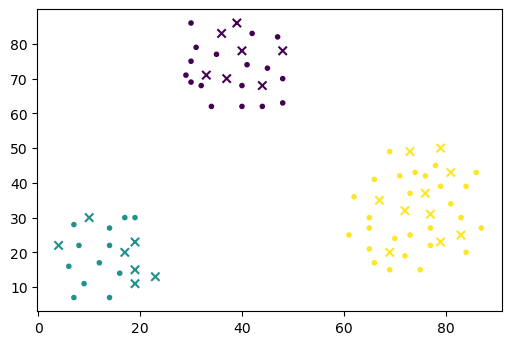

In [13]:
nazwa_pliku = 'dane1.csv'
df = pd.read_csv(nazwa_pliku)
d = podziel(df,0.3)
granice(0,d,0,1,"",0)

>**Zadanie** Wykonaj powyższy kod kilkukrotnie. Czy widzisz jakieś różnice między wynikami kolejnych wywołań ? Jeśli tak, to czym to może być spowodowane ?

## 2. Klasyfikator $k$-najbliższych sąsiadów (k-NN)

Klasyfikator $k$-najbliższych sąsiadów jest uogólnieniem klasyfikatora najbliższego sąsiada. W jego przypadku, przynależność klasyfikowanego obiektu do klasy określana jest na podstawie znanych klas do których należy ustalona liczba $k$ najbliższych sąsiadów. Klasa wynikowa odpowiada klasie dominującej w zbiorze $k$-najbliższych sąsiadów.

> **Zadanie** Jak zwiększenie liczby sąsiadów wpłynie na wynik klasyfikacji zbioru `dane2` ? Dlaczego tak się dzieje ?

In [14]:
# miejsce na kod


Analiza wpływu liczby $k$ na wynik klasyfikacji na przykładzie zbioru `dane3`.

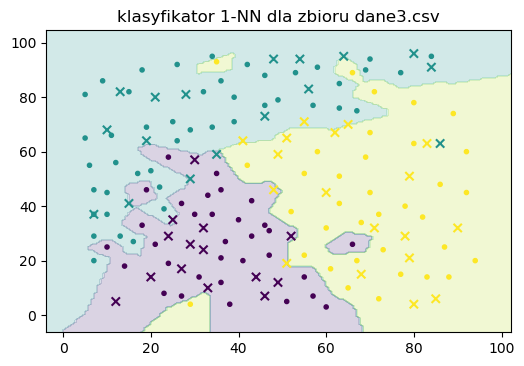

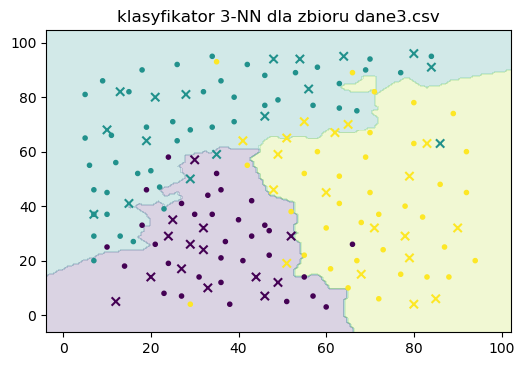

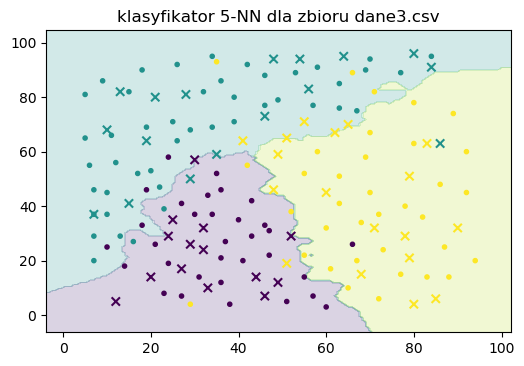

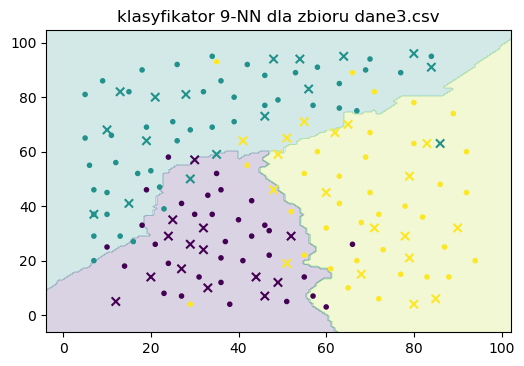

In [15]:
nazwa_pliku = 'dane3.csv'
df = pd.read_csv(nazwa_pliku)
d = podziel(df,0.3)
for k in [1,3,5,9]:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    granice(model_knn,d,0,1,"klasyfikator " + str(k)+ "-NN dla zbioru " + nazwa_pliku)


> **Zadanie** Poeksperymentuj w analogiczny sposób z pozostałymi macierzami danych. Oceń przydatność klasyfikatora w każdym z przeanalizowanych przypadków.

In [16]:
# miejsce na kod


W celu doboru właściwej (na ogół nieparzystej) ilości sąsiadów należy wykonać analizę błędu klasyfikacji dla różnej ilości sąsiadów.

Text(0, 0.5, 'Prawdopodobienstwo bledu')

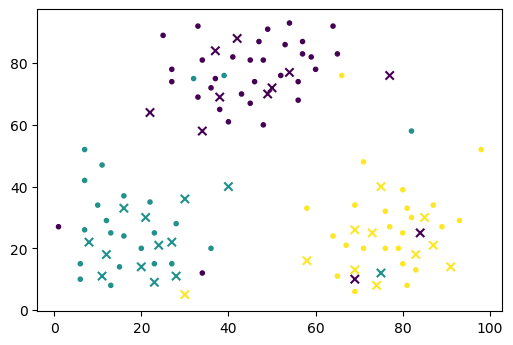

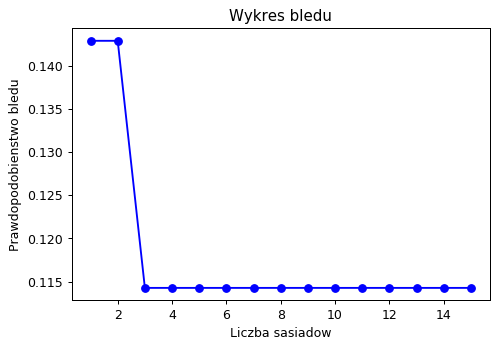

In [17]:
nazwa_pliku = 'dane2.csv'
df = pd.read_csv(nazwa_pliku)
d = podziel(df,0.3)
granice(model,d,0,1,"",0)
kvals = range(1, 16)
rss_all = np.zeros(15)
for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(d['opis_ucz'],d['dec_ucz'])
    predictions = model.predict(d['opis_test'])
    rss_all[k-1] = 1-model.score(d['opis_test'],d['dec_test'])
plt.figure(dpi=90)
plt.plot(kvals, rss_all,'bo-')
plt.title('Wykres bledu')
plt.xlabel('Liczba sasiadow')
plt.ylabel('Prawdopodobienstwo bledu')

> **Zadanie** Jak na podstawie powyższego wykresu określić optymalną liczbę sąsiadów ? Jak przebiega ten wykres dla różnych zbiorów danych (porównaj m.in. `dane2` i `dane3`) ? Skąd się biorą różnice w jego przebiegu ?

In [18]:
# miejsce na kod


> **Zadanie** Dobierz optymalną liczbę $k$ dla innych zbiorów 

In [19]:
# miejsce na kod


## 3. Metoda najbliższych prototypów

Wadą wszystkich opisanych do tej pory klasyfikatorów najbliższych sąsiadów jest konieczność korzystania podczas procesu klasyfikacji z całego zbioru uczącego. Dla dużej liczby obiektów zbioru uczącego i dużej liczby cech proces klasyfikacji staje się czasochłonny. Często zachodzi ponadto konieczność przechowywania całego zbioru w pamięci. Rozwiązaniem tego problemu jest redukcja zbioru uczącego do zbioru składającego się z obiektów reprezentatywnych dla każdej z rozpatrywanych klas – prototypów klas. Wówczas, zamiast rozpatrywania całego zbioru uczącego, rozpatrywany jest jedynie zbiór prototypów. Takie podejście nosi nazwę **klasyfikacji najbliższego prototypu**.
Wartości atrybutów opisujących (cech) prototypu klasy są wyznaczane najcześciej jako miary tendencji centralnej klasy. Najczęściej stosowaną miarą jest tu średnia arytmetyczna, która w tym przypadku nosi nazwę centroidu klasy (zwróć uwagę na podobieństwo z metodą grupowania k-średnich). Podzbiory danych odpowiadające poszczególnym klasom są więc, w tym przypadku, zastępowane przez centroidy klas.  

Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      29   1   1
1       2  21   1
2       1   1  22
Macierz pomyłek dla zbioru testowego
col_0   0   1   2
row_0            
0      10   1   1
1       0  11   1
2       0   0  11


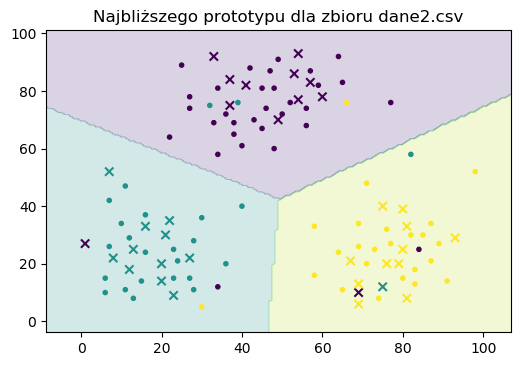

In [19]:
nazwa_pliku = 'dane2.csv'
# wczytanie badanego zbioru danych
df = pd.read_csv(nazwa_pliku)
# podział zbioru danych
d = podziel(df,0.3)
# zdefiniowanie modelu klasyfikatora
model = NearestCentroid()
# granice dycyzyjne
granice(model,d,0,1,"Najbliższego prototypu dla zbioru " + nazwa_pliku)
# weryfikacja
weryfikuj(model,d,[0,1])

> **Zadanie** Poeksperymentuj w analogiczny sposób z pozostałymi macierzami `dane`, w tym także ze zbiorem `iris`. Ocen przydatność klasyfikatora dla każdego zbioru danych.

In [21]:
# miejsce na kod


> **Pytania** 
1. Czy w przypadku klasyfikatora najblizszych prototypów zachodzi faza uczenia ? Jesli tak, to na czym polega ?
2. Jak zmierzyć stopień rozproszenia wartości atrybutu wokół wartości średniej ?

> **Zadanie**  Wykonaj klasyfikacje klasyfikatorem $k$-NN, dla różnych wartości $k$ oraz klasyfikatorem najbliższych prototypów. Wykonaj weryfikację wyników klasyfikacji na zbiorze uczącym i testowym dla każdego z trzech klasyfikatorów. Oceń wyniki. Zastanów się jak zinterpretować błędne wskazania klasyfikatora dla obiektów ze zbioru uczącego ? Dlaczego może się zdarzyć tak, że nie wszystkie obiekty zbioru uczącego są poprawnie klasyfikowane? Na wykresie punktowym wskaż takie obiekty. Czy – w tym konkretnym przypadku – niepoprawna klasyfikacja jest efektem pozytywnym czy negatywnym ? O jakiej własności klasyfikatora ona świadczy ?

In [22]:
# miejsce na kod


## 4. Naiwny klasyfikator Bayesa

Podstawa **klasyfikacji Bayesowskiej** jest twierdzenie Bayesa, które dotyczy prawdopodobieństw warunkowych. W przypadku klasyfikacji, zdarzenia losowe, które są brane pod uwagę przy wyznaczaniu prawdopodobieństw, odnoszą się do dwóch faktów związanych z rozpoznawanymi obiektami: posiadania przez obiekt konkretnego zbioru wartości atrybutów opisujących zapisanego zwykle w formie wektora wartości atrybutów oraz przynależności tego obiektu do poszczególnych klas. Przynależność obiektu do poszczególnych klas jest określana przy pomocy funkcji dyskryminacyjnych. i-ta funkcja dyskryminacyjna dla obiektu o wektorze atrybutów opisujących jest w tym przypadku tożsama prawdopodobieństwu warunkowemu przynależności obiektu do i-tej klasy pod warunkiem posiadania przez obiekt konkretnych cech. Wygodnym założeniem jest brak zależności między poszczególnymi atrybutami opisujacymi. Dzięki niemu można przyjać, że zdarzenia losowe polegąjace na posiadaniu przez obiekt konkretnych wartości poszczególnych atrybutów są od siebie niezależne. Klasyfikatory spełniajace to założenie noszą nazwę naiwnych klasyfikatorów Bayesowskich. W przypadku atrybutów ilościowych niezbędne prawdopodobieństwa szacuje się z wykorzystaniem typowych rozkładów zmiennych losowych.

Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      15   0   0
1       0  14   0
2       0   0  27
Macierz pomyłek dla zbioru testowego
col_0  0  1   2
row_0          
0      9  0   0
1      0  5   0
2      0  0  10


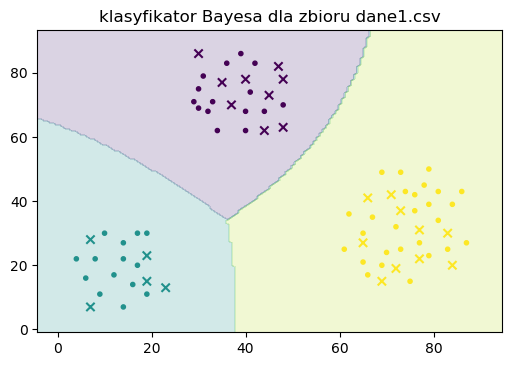

In [23]:
nazwa_pliku = 'dane1.csv'
# wczytanie badanego zbioru danych
df = pd.read_csv(nazwa_pliku)
# podział zbioru danych
d = podziel(df,0.3)
# zdefiniowanie modelu klasyfikatora
model = GaussianNB()
# granice dycyzyjne
granice(model,d,0,1,"klasyfikator Bayesa dla zbioru " + nazwa_pliku)
# weryfikacja
weryfikuj(model,d,[0,1])

> **Zadanie** Wykonaj klasyfikacje klasyfikatorem Bayesa wszystkich zbiorów, dla których wyniki klasyfikacji najblizszego prototypu były niezadowalajace. Czy zastosowanie klasyfikatora
Bayesa je polepsza ? Jeśli tak to co jest tego przyczyną ?

In [24]:
# kod zadania


> **Zadanie** Znajdź zbiory danych, w przypadku których wyniki klasyfikacji Bayesowskiej są gorsze niz $k$-NN. Zastanów się dlaczego tak się dzieje. Dla jakich dystrybucji obiektów w przestrzeni atrybutów (położenia zbiorów punktów na wykresie punktowym) klasyfikator Bayesa daje dobre wyniki, a dla jakich gorsze ? Co jest tego przyczyną ? 

In [25]:
# kod zadania


> **Zadanie** Poeksperymentuj z pozostałymi macierzami danych. Oceń przydatność klasyfikatora dla każdego zbioru danych.

In [26]:
# kod zadania


## 5. Drzewa decyzyjne

**Drzewa decyzyjne** są strukturą grafowa przedstawiającą zależności między atrybutami obiektów. Dzięki hierarchicznej reprezentacji tych zależności drzewo nie tylko jest klasyfikatorem, ale także umożliwia analizę istotności poszczególnych atrybutów w klasyfikacji konkretnego zbioru danych. 

Częstym problemem przy klasyfikacji za pomoca drzew jest przetrenowanie (utracenie zdolności generalizacji). Nie zawsze stuprocentowo skuteczna klasyfikacja zbioru uczącego przekłada się na dobre wyniki klasyfikacji zbioru testowego, ponieważ drzewo, w którym jest zbyt wiele zbyt szczegółowych testów traci zdolność uogólnienia. Problem przetrenowania może byc rozwiązany na dwa sposoby, poprzez:
* wstrzymanie budowy drzewa, zanim osiagnie maksymalne rozmiary (ograniczanie w trakcie rozrostu), lub
* przycinanie drzewa po jego wyznaczeniu (drzewa maksymalnego).

Macierz pomyłek dla zbioru uczącego
col_0   0   1   2
row_0            
0      18   0   0
1       0  13   0
2       0   0  25
Macierz pomyłek dla zbioru testowego
col_0  0  1   2
row_0          
0      6  0   0
1      0  6   0
2      0  0  12


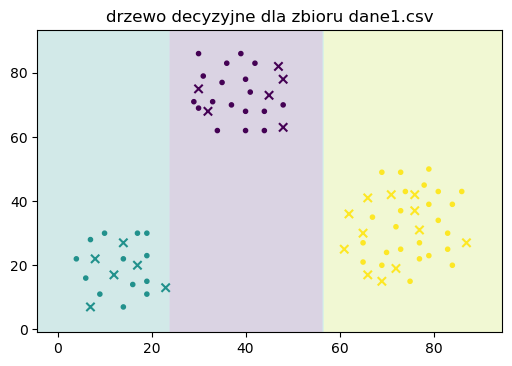

In [27]:
nazwa_pliku = 'dane1.csv'
# wczytanie badanego zbioru danych
df = pd.read_csv(nazwa_pliku)
# podział zbioru danych
d = podziel(df,0.3)
# zdefiniowanie modelu klasyfikatora
model = tree.DecisionTreeClassifier(max_depth=4)
# granice dycyzyjne
granice(model,d,0,1,"drzewo decyzyjne dla zbioru " + nazwa_pliku)
# weryfikacja
weryfikuj(model,d,[0,1])

Drzewa decyzyjne o różnych głębokościach.

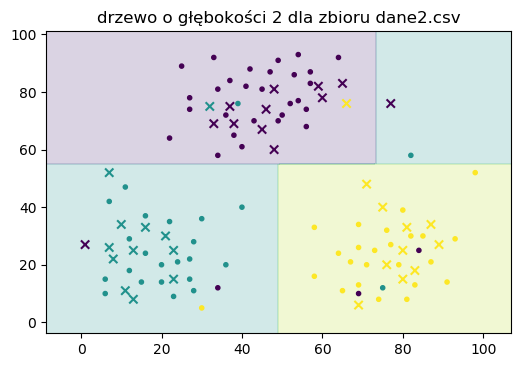

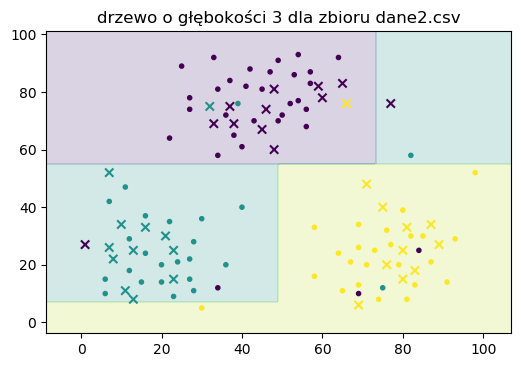

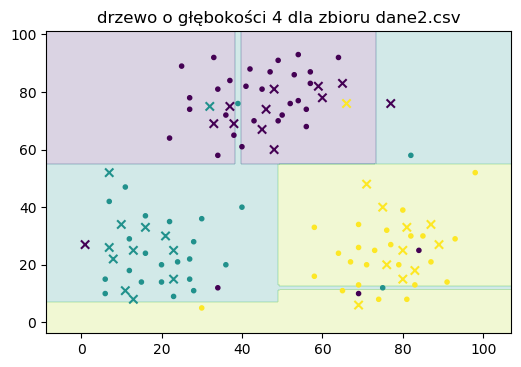

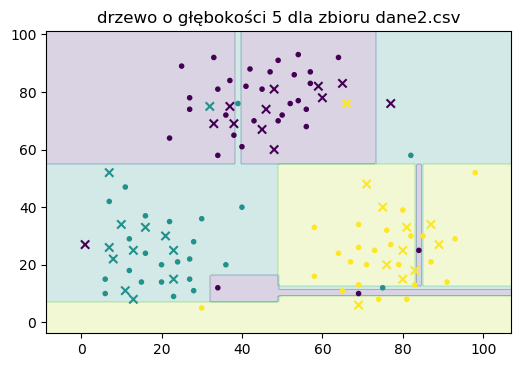

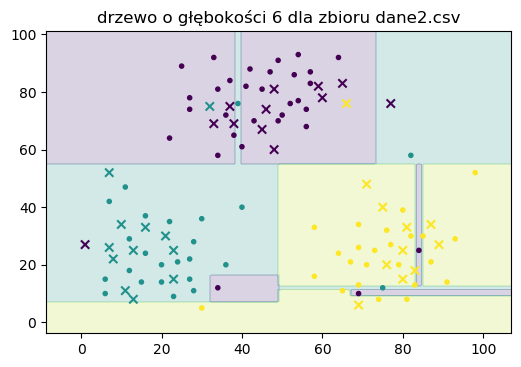

In [28]:
nazwa_pliku = 'dane2.csv'
# wczytanie badanego zbioru danych
df = pd.read_csv(nazwa_pliku)
# podział zbioru danych
d = podziel(df,0.3)
for g in [2,3,4,5,6]:
    drzewo = tree.DecisionTreeClassifier(max_depth=g)
    tekst = "drzewo o głębokości " + str(g) + " dla zbioru " + nazwa_pliku
    granice(drzewo ,d,0,1,tekst)

> **Zadanie** Utwórz drzewa decyzyjne dla innych zbiorów danych. Oceń przydatność otrzymanego klasyfikatora dla każdego zbioru danych. Dla jakich danych konstrukcja drzew jest prostsza, a dla jakich – bardziej skomplikowana ? Dlaczego tak się dzieje ? Jak wielkość drzewa wpływa na skuteczność klasyfikacji ?

In [29]:
# kod zadania


> **Zadanie** Poeksperymentuj z rożnymi klasyfikatorami na zbiorze `iris` o czterech atrybutach decyzyjnych, wybierając tylko dwa z nich. Zwróć uwagę na to, jak wybór dwóch z czterech atrybutów wpływa na wynik klasyfikacji. Wskaż najlepszą i najgorszą parę atrybutów z punktu widzenia poprawności klasyfikacji. Czy przy pomocy macierzy wykresów punktowych dla tego zbioru danych jesteś w stanie wskazać cechy rozkładu punktów, które potwierdzaja ten wybór ? Porównaj wynik klasyfikacji dla najlepszej pary atrybutów z klasyfikacja z wykorzystaniem wszystkich czterech atrybutów.

In [30]:
# kod zadania


> **Zadanie** Przeanalizuj zbiór `dane20.csv`. Wykonaj stosowną wyzualizację danych. Określ, które atrybuty mają wpływ na przynależność obiektu do klasy, a które - nie. Przetestuj omówione klasyfikatory wykorzystując w klasyfikacji: 
1. wszystkie atrybuty
2. atrybuty wpływające na klasę obiektu
3. atrybuty niewpływające na klasę 
4. dowolną mieszankę obu rodzajów atrybutów

In [31]:
# kod zadania


## 6. Regresja liniowa

Omówiona w ramach ćwiczenia z miarami danych, miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

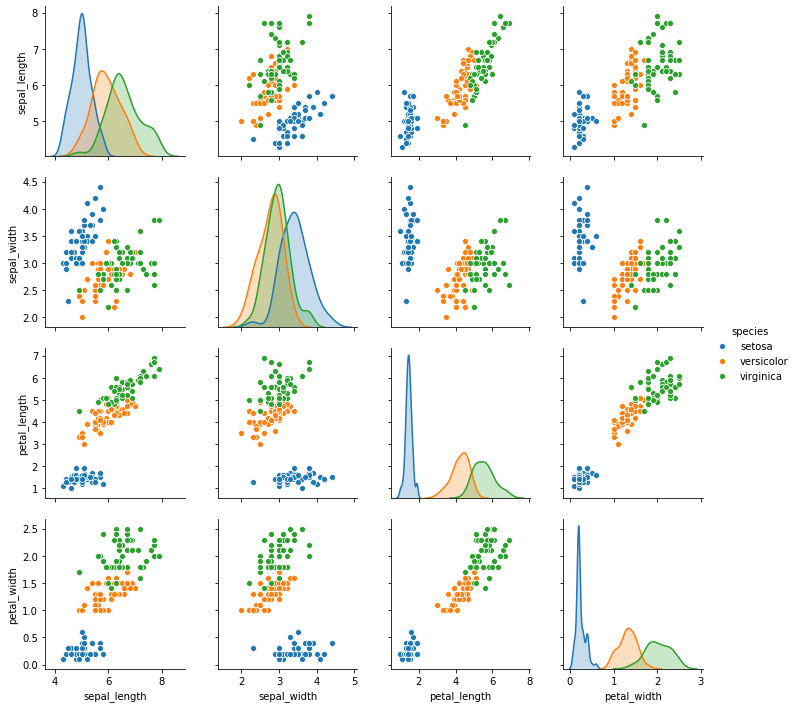

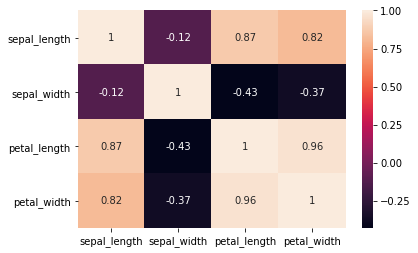

In [22]:
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()
sns.heatmap(iris.corr(),annot = iris.corr())

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie się do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [24]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [25]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [26]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [27]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

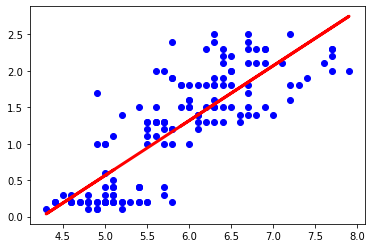

In [28]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [38]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427363

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość bładu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (wariancja) modelu jest największa, a dla których - najmniejsza. Czy można zauważyć zależność tej miary od miary korelacji ?

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

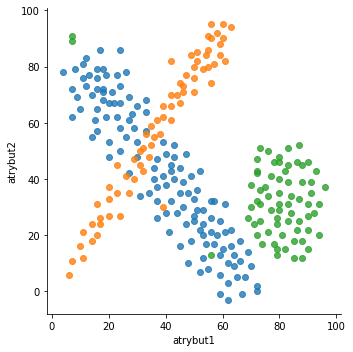

In [39]:
d = pd.read_csv('dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [40]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


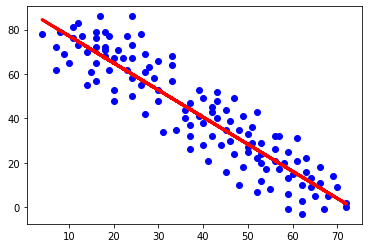

In [41]:
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [42]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

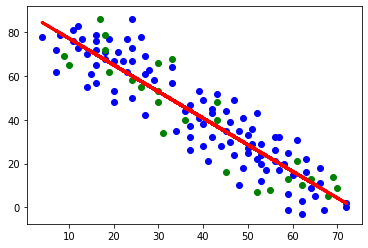

błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452


In [43]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele sa bardziej, a dla których - mniej stabilne ? Co może być tego przyczyną ?

---
---
Historia zmian:
* wersja pierwotna r.akad 18/19: 04.2019, 10.2019 (MI)
* wersja r.akad 19/20: 23.04.2020 (MI, GS)
* wersja r.akad 20/21: 30.11.2020 (MI) - b.z.